<a href="https://colab.research.google.com/github/thopiyawan/topic-modeling-thai/blob/main/count_sklearn_topic_modeling_th_Base_Model%E0%B8%A3%E0%B8%AD%E0%B8%9A2(0.5%2C5).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [143]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [144]:
!pwd

/content/drive/.shortcut-targets-by-id/1UHDKxOFjfONnMYU-auICT39cUoR5NF0D/SWU-Master-Thesis-63/Ploy/topicmodeling_thai


In [145]:
cd /content/drive/My Drive/SWU-Master-Thesis-63/Ploy/topicmodeling_thai

/content/drive/.shortcut-targets-by-id/1UHDKxOFjfONnMYU-auICT39cUoR5NF0D/SWU-Master-Thesis-63/Ploy/topicmodeling_thai


In [146]:
!pip install -r requirements.txt

  Using cached https://files.pythonhosted.org/packages/dc/16/7724205e25a8fdd2bc5ccb79c9240947f5cba9dc07e58c30e6df85fd82c0/astropy-4.2-cp37-cp37m-manylinux1_x86_64.whl
Reason for being yanked: re-release with new wheels
  Using cached https://files.pythonhosted.org/packages/8f/ba/1d22e9d2f332f07aaa57041f5dd569c2cb40a92bd6374a0b743ec3dfae97/atari_py-0.2.6-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/c3/aa/cb45262569fcc047bf070b5de61813724d6726db83259222cd7b4c79821a/attrs-20.3.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/dd/a5/81076e10b5ef74493cf08a8e419e61b64324c9c55db4aa7f89c0240c4873/Babel-2.9.0-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/05/49/76c0bed3272ba8f812eb41e95514083122a0358d13848be8198a6b394530/bokeh-2.3.0.tar.gz
  Using cached https://files.pythonhosted.org/packages/bb/72/8df2e0dc991f1a1d2c6869404e7622e8ee50d80bff357dbb57c3df70305b/cachetools-4.2.1-py3-none-any.whl
  U

In [147]:
import time
start_time = time.time()

In [148]:
import requests
from bs4 import BeautifulSoup
from time import  time, sleep
from random import randint

# from googletrans import Translator

from tqdm import tqdm
from tqdm import tqdm_notebook
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

from nltk import sent_tokenize, word_tokenize
from nltk.sentiment.vader import  SentimentIntensityAnalyzer
from nltk.sentiment.util import mark_negation

In [149]:
dataset = pd.read_csv("dataset/QA_pregnancy.csv",encoding='utf8')
print(dataset.shape)
dataset.head()


(9987, 5)


,question,href,date_ask,user,answer
0,ตั้งครรภ์,https://hd.co.th//ask/27734160,"October 01, 2019 17:30",\nHonestDocs User 1082087\n,เราได้รับคำถามของคุณแล้ว รอทีมแพทย์มาตอบคำถามส...
1,ตั้งครรภ์5เดือนสามารถตัดปากมดได้ไหม,https://hd.co.th//ask/51006398,"June 30, 2018 14:49",\nHonestDocs User 912491\n,NaN
2,ตั้งครรภ์14สัปดาค่ะปวดท้องเหนือสะดือเเนวยาวร่อ...,https://hd.co.th//ask/4362714,"August 31, 2018 15:07",\nHonestDocs User 929536\n,NaN
3,ตั้งครรภ์24สัปดาห์โดนหมากัดที่ขามีรอยถลอกต้องไ...,https://hd.co.th//ask/33971594,"November 07, 2018 18:58",\nHonestDocs User 954767\n,วัคซีนพิษสุนัทบ้าและอิมมูโนโกลบูลินสามารถให้ใน...
4,ตั้งครรภ์ แต่ได๋อัลตราซาวด์ดูหมอบอกมีเลือกออกบ...,https://hd.co.th//ask/48478898,"August 06, 2018 1:35",\nHonestDocs User 921834\n,รบกวนขอข้อมูลเพพิ่มเติมด้วยครับ คุณแม่อายุเท่า...


In [150]:
dataset.describe()

,question,href,date_ask,user,answer
count,9987,9987,9982,9986,9529
unique,9891,9987,9901,8251,8995
top,คุณหมอคะ ถ้ากินยาคุมฉุกเฉินไปแล้ว เราจะกินยาคุ...,https://hd.co.th//ask/54861998,"May 13, 2018 22:29",\nHonestDocs User \n,สวัสดีค่ะ คำถามของคุณอาจกว้างเกินไป ทำให้คุณหม...
freq,3,1,3,616,195


In [151]:
print(dataset.shape)
print("===============================================")
print(dataset.info())

(9987, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9987 entries, 0 to 9986
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   question  9987 non-null   object
 1   href      9987 non-null   object
 2   date_ask  9982 non-null   object
 3   user      9986 non-null   object
 4   answer    9529 non-null   object
dtypes: object(5)
memory usage: 390.2+ KB
None


In [152]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [153]:
try:
    %tensorflow_version 2.x
except:
    pass

In [154]:
#dev version
# !pip install https://github.com/PyThaiNLP/pythainlp/archive/dev.zip

# release version 
! pip install pythainlp

!pip install epitran
!pip install sklearn_crfsuite
!pip install tensorflow deepcut
!pip install attacut

In [155]:
import warnings
warnings.filterwarnings('ignore')

In [156]:
import pythainlp

pythainlp.__version__

'2.3.1'

In [157]:
import re, string, unicodedata

In [158]:
from pythainlp import sent_tokenize, word_tokenize
from pythainlp.corpus import thai_stopwords
from pythainlp.util import normalize
from pythainlp.spell import correct


stopwords = list(thai_stopwords())


In [159]:
dataset = dataset[['question','user']]
dataset['index'] = dataset.index
dataset 

,question,user,index
0,ตั้งครรภ์,\nHonestDocs User 1082087\n,0
1,ตั้งครรภ์5เดือนสามารถตัดปากมดได้ไหม,\nHonestDocs User 912491\n,1
2,ตั้งครรภ์14สัปดาค่ะปวดท้องเหนือสะดือเเนวยาวร่อ...,\nHonestDocs User 929536\n,2
3,ตั้งครรภ์24สัปดาห์โดนหมากัดที่ขามีรอยถลอกต้องไ...,\nHonestDocs User 954767\n,3
4,ตั้งครรภ์ แต่ได๋อัลตราซาวด์ดูหมอบอกมีเลือกออกบ...,\nHonestDocs User 921834\n,4
...,...,...,...
9982,คุณหมอคะ หลังจากที่เรามีเพศสัมพันธ์ กี่วันคะ จ...,\nHonestDocs User 904412\n,9982
9983,ประจำเดือนขาดมาครั้งสุดท้ายเมื่อต้นเมษายนค่ะ แ...,\nHonestDocs User 904485\n,9983
9984,รับทำแท้งมั้ยค่ะ,\nHonestDocs User 907823\n,9984
9985,เดือนพคประจำเดือนมาช่วงต้นเดือนและกลางเดือน2รอ...,\nHonestDocs User 906992\n,9985


In [160]:
dataset['question'].tail(20)

9967    คือหนูอายุ14ปีค่ะ แล้วประจำเดือนมา20 กว่าวันแล...
9968    สวัสดีค่ะ คือประจำหนูขาดมา36วันแล้วนับจากประจำ...
9969    มีเพศสัมพันธ์วันที่5พคหลั่งนอกทานยาคุมฉุกเฉินต...
9970    ผมมีเพศสัมพันธ์ กับคนที่ไม่รู้จัก แล้วผมมีอากา...
9971    เป็นอีสุกอีใสมีไข้นิดหน่อยแต่อ่อนเพลียตอนนี้เป...
9972    มีอะไรกันกีบเเฟน แต่ป้องกันคับ ใส่ถุง เเต่ถุงย...
9973    หมอค่ะ คือหนูกินยาคุมกำเนิดของซูซี่21เม็ดมาประ...
9974    คือมีอะไรกับเเฟนครับ เเล้วรีบไปซื้อยาคุม zarin...
9975    มีเพศสัมพันธ์กับแฟนวันที่7 มิย หลั่งนอก ทานยาค...
9976    สวัสดีครับคุณหมอพอดีผมมีเพศสัมพันธุ์กับแฟนวันท...
9977    ประจำเดือนไม่มา4เดือนแล้วค่ะ ซื้อที่ตรวจครรภ์ม...
9978    ถ้ากินยาคุมฉุกเฉินไปแล้ว ประจำเดือน ไม่มาแต่มา...
9979    คือวันที่20 พฤษภาคมมีเพศสัมพันธุ์กับแฟนโดยสวมถ...
9980    สอบถามคุณหมอค่ะ ดิฉันอายุ 25 ปี เพิ่งขูดมดลูกไ...
9981    เมื่อวันที่ 22 เมยมีอะไรกับแฟนแล้วถุงยางรั่วตอ...
9982    คุณหมอคะ หลังจากที่เรามีเพศสัมพันธ์ กี่วันคะ จ...
9983    ประจำเดือนขาดมาครั้งสุดท้ายเมื่อต้นเมษายนค่ะ แ...
9984          

In [161]:
from sklearn import preprocessing

In [162]:

import pandas as pd
import numpy as np
import time
from pymongo import MongoClient
from bson.objectid import ObjectId

import datetime
import calendar
import scipy.stats
from datetime import timedelta, date
import pytz
from pytz import timezone
import multiprocessing
from multiprocessing import cpu_count #For Parallel
import re


cores = cpu_count() #Number of CPU cores on your system
partitions = cores #Define as many partitions as you want to run parallel

# def lemmatize_stemming(text):
#     return stemmer.stem(WordNetLemmatizer().lemmatize(text, pos='v'))

def parallelize(data, func):
    data_split = np.array_split(data, partitions)
    pool = multiprocessing.Pool(cores)     #สร้าง multiprocessor จำนวนเท่ากับ core cpu ของ server
    data = pd.concat(pool.map(func, data_split))
    pool.close()
    pool.join()
    return data

#ตัดคำ
def preprocess(documents):
    # replace_word = ['เพศสัมพันธุ์','เพศสัมพัน','เพสสัมพัน']
    list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
                 
    #list_words = []
    result = []
    for token in word_tokenize(documents, engine='newmm'): 
        token = token.strip()
        token = correct(token)
        if token not in stopwords and len(token) >5 and token not in list_words:
            # token = correct(token)
            # token = token.replace('สัมพันธุ์','สัมพันธ์')
            # token = token.replace('สัมพัน','สัมพันธ์')
            # token = token.replace('สัมพันธ์ธ์','สัมพันธ์')
            # token = token.replace('เพส','สัมพันธ์')
            # token = correct(str(token))
            result.append(token)
    return result


def func(documents):
    res = documents['headline_text'].map(preprocess)
    return res

def cleanText(documents):
    documents['headline_text'] = documents['headline_text'].str.replace('|',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\\',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('\/',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('.',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('_','')
    documents['headline_text'] = documents['headline_text'].str.replace('\d+', '')
    documents['headline_text'] = documents['headline_text'].str.replace('-',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('+',' ')
    pattern = '|'.join(['&', '%', ';', '='])
    documents['headline_text'] = documents['headline_text'].str.replace(pattern, ' ')
    # documents = documents.loc[~documents['headline_text'].str.contains('img')]
    documents.headline_text.replace({r'[^ก-๙]':''}, regex=True, inplace=True)
    documents.headline_text.replace({u"[^\u0E00-\u0E7Fa-zA-Z' ]|^'|'$|''"}, regex=True, inplace=True)
    documents['headline_text'] = documents['headline_text'].str.replace(':',' ')
    documents['headline_text'] = documents['headline_text'].str.replace('#',' ')
    documents['headline_text'] = documents['headline_text'].str.strip()
    documents = documents.loc[documents['headline_text']!= ""]
    documents = documents.dropna().reset_index(drop=True)
    return documents


In [163]:
dataset = dataset.iloc[:,:]
documents = dataset.copy()
documents = documents.rename(columns={'question':'headline_text'})

documents = documents.groupby('user')['headline_text'].agg(lambda col: ' '.join(col)).reset_index()
print(documents.shape[0])
documents.head()



8251


,user,headline_text
0,\nHonestDocs User \n,ตั้งครรภ์35week่ท้องแข็งบ่อยมากจะมีอันตรายกับเ...
1,\nHonestDocs User 1000031\n,รบกวนสอบถามหน่อยค่ะ มีเพศสัมพันธ์ประมาณวันที่ ...
2,\nHonestDocs User 1000061\n,ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...
3,\nHonestDocs User 1000074\n,ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับ ปลอา...
4,\nHonestDocs User 1000159\n,สวัสดีค่ะคุณหมอ พอดีว่าปกติเป็นคนทานยาคุมพรีม2...


In [164]:
documents = parallelize(documents,cleanText)
documents.head()


,user,headline_text
0,\nHonestDocs User \n,ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในค...
1,\nHonestDocs User 1000031\n,รบกวนสอบถามหน่อยค่ะมีเพศสัมพันธ์ประมาณวันที่แล...
2,\nHonestDocs User 1000061\n,ถ้าผมช่วยตัวเองเสร็จก่อนหน้าแล้วผมใช้ผ้าเช็ดน้...
3,\nHonestDocs User 1000074\n,ถ้ายังไม่พร้อมมีลูกทำแท้งผิดกฎหมายไหมครับปลอาย...
4,\nHonestDocs User 1000159\n,สวัสดีค่ะคุณหมอพอดีว่าปกติเป็นคนทานยาคุมพรีมเม...


In [165]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

def cleanText(text):
  text = str(text)
  text = re.sub('[^ก-๙]','',text)
  stop_word = list(thai_stopwords())
  sentence = word_tokenize(text, engine='newmm')
  list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','ผู้เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ','แล้วก็','แบบนี้']
  result = [word for word in sentence if word not in stop_word and len(word) > 5 and " " not in word and word not in list_words]
  return "/".join(result)

def tokenize(d):
  result = d.split("/")
  result = list(filter(None, result))
  return result

new_text = []
for txt in documents["headline_text"]:
  new_text.append(cleanText(txt))

vectorizer = CountVectorizer(analyzer='word',  max_df = 0.5, min_df = 5,stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )
transformed_data = vectorizer.fit_transform(new_text)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

,word,count
279,ประจำเดือน,5721
165,ตั้งครรภ์,2412
344,มีเพศสัมพันธ์,2159
346,มีโอกาส,1477
111,ฉุกเฉิน,1247
99,คุณหมอ,1217
187,ถุงยาง,895
298,ป้องกัน,790
353,ยาคุมกำเนิด,521
463,หลังจากนั้น,416


In [166]:
keyword_df2.shape

(682, 2)

In [167]:
keyword_df2.sum()

word     กระดาษกระตุกกระตุ้นกระทันหันกระเด็นกระแทกกรุงเ...
count                                                38368
dtype: object

In [168]:
print(new_text)

['ตั้งครรภ์/ท้องแข็ง/อันตราย/ตั้งครรภ์/ท้องน้อย/อวัยวะเพศ/ตั้งครรภ์/มีประโยชน์/มีผลกระทบ/ตั้งครรภ์/สาเหตุ/ตั้งครรภ์/อันตราย/ตั้งครรภ์/ตั้งครรภ์/ออกกำลังกาย/ตั้งครรภ์/คุกคาม/ล้างหน้า/ชาวบ้าน/ตั้งครรภ์/ผิดปกติ/ตั้งครรภ์/หัดเยอรมัน/ตั้งครรภ์/คร้ำไม/ตั้งครรภ์/ความผิดปกติ/โครโมโซม/ความเสี่ยง/เป็นโรค/น้ำคร่ำ/ตั้งครรภ์/ปวดท้อง/ไม่เป็นอะไร/ปวดท้อง/ท้องแข็ง/เป็นอันตราย/ประจำเดือน/คุมกำเนิด/ตั้งครรภ์/เวลานอน/เพราะอะไร/เป็นโรค/ตั้งครรภ์/ผลกระทบ/ตั้งครรภ์/หน่ววๆ/อวัยวะเพศ/อยากรู้/ผู้หญิง/ตั้งครรภ์/ใหมคร๊/ตั้งครรภ์/คุมกำเนิด/ตั้งครรภ์/ตอนที่/ตั้งครรภ์/สุขภาพ/มีผลกระทบ/หรือว่า/เกิดขึ้น/ตั้งครรภ์/เกิดขึ้น/ตั้งครรภ์/ขนอ่อน/โดยเฉพาะ/หน้าท้อง/ตั้งครรภ์/เวลานอน/นอนตะแคง/ตั้งครรภ์/น้ำหนัก/น้ำหนัก/ผิดปกติ/เป็นโรค/ตั้งครรภ์/มีสิทธิ์/เป็นโรค/ตั้งครรภ์/เวลานอน/อยากรู้/เพราะอะไร/ตั้งครรภ์/รับประทาน/ประเภท/แข็งแรง/ผู้หญิง/ตั้งครรภ์/คุณแม่/ตั้งครรภ์/ยาระบาย/ท้องผูก/คุณแม่/คาเฟอีน/ที่อยู่/ตั้งครรภ์/ตั้งครรภ์/มีผลต่อ/ป้องกัน/อย่างไรบ้าง/ตั้งครรภ์/ถึงกำหนด/ถึงกับ/สูญเสีย/ที่สอง/คลอดลูก/เป็นปกติ/อันตราย/ผู้หญิง/โรงพ

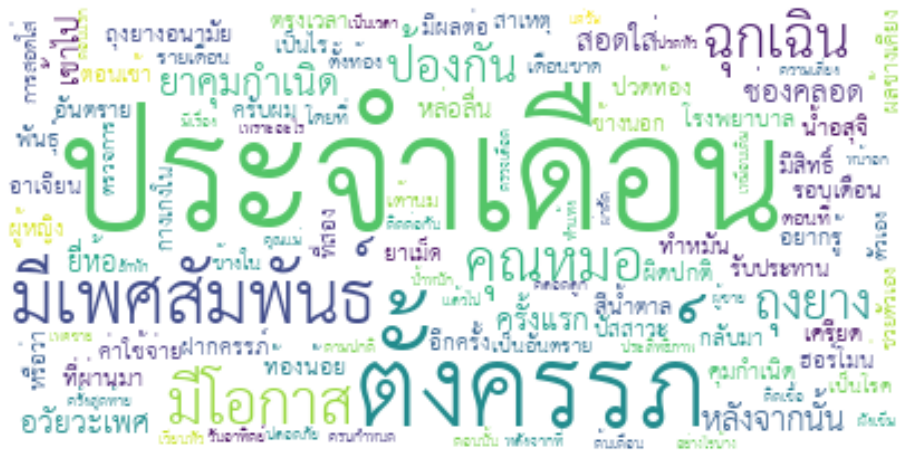

In [169]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
word_dict = {}
for i in range(0,len(keyword_df2)):
   word_dict[keyword_df2.word[i]]= keyword_df2['count'][i]
wordcloud = WordCloud(font_path='dataset//THSarabunNew.ttf',background_color ='white',max_words=100,collocations=False).fit_words(word_dict)
fig, ax = plt.subplots(1, 1, figsize=(16, 12))
ax.imshow(wordcloud, interpolation='bilinear')
ax.axis("off")
fig.show()
fig.savefig("wordclod-paper.png")

In [170]:
print("--- %s seconds ---" % (time.time() - start_time))

--- 29.497089624404907 seconds ---


bubble แต่ละอันคือ topic <br>
bubble ที่ใหญ่จะมีความแพร่หลายและโดดเด่นมาก <br>

รูปแบบหัวข้อที่ดีจะเป็นหัวข้อที่ค่อนข้างใหญ่ซึ่งกระจัดกระจายอยู่ในควอดแดรนต์ที่แตกต่างกันแทนที่จะกระจุกอยู่ในจตุภาคเดียว  <br>

- The model with too many topics will have many overlaps, small sized bubbles clustered in one region of chart.
- If you move the cursor the different bubbles you can see different keywords associated with topics.

In [171]:
!pip3 install spacy
!python3 -m spacy download en #Language model
!pip3 install gensim # For topic modeling
!pip install pyLDAvis==2.1.2 # For visualizing topic models


✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.7/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.7/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [172]:
# Run in terminal or command prompt
# python3 -m spacy download en
import numpy as np
import pandas as pd
import re, nltk, spacy, gensim
# Sklearn
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import GridSearchCV
from pprint import pprint
# Plotting tools
import pyLDAvis
import pyLDAvis.sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [173]:
df = documents.dropna(subset=['headline_text'])

In [174]:
# Convert to list
data = df.headline_text.values.tolist()
# Remove Emails
data = [re.sub(r'\S*@\S*\s?', '', sent) for sent in data]
# Remove new line characters
data = [re.sub(r'\s+', ' ', sent) for sent in data]
# Remove distracting single quotes
data = [re.sub(r"\'", "", sent) for sent in data]
pprint(data[:1])

['ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในครรภ์มั้ยคะตั้งครรภ์สัปดาห์เจ็บหน่วงบริเวณท้องน้อยและอวัยวะเพศต้องทำไงตั้งครรภ์ควรดื่มนมวัวมั้ยคะมีประโยชน์แบะมีผลกระทบการดื่มนมวัวมากไปหรือไม่ต่อเด็กในครรภ์ตั้งครรภ์แล้วรกต่ำสาเหตุเกิดจากอะไรคะตั้งครรภ์เดือนกว่ามีตกขาวมาตลอดจะอันตรายกับลูกในครรภ์ไหมคะตั้งครรภ์สัปดาห์ลูกไม่ดิ้นเป็นอะไรหรือป่าวคะตั้งครรภ์สัปดาห์สามารถออกกำลังกายอะไรได้บ้างคะที่จะให้ลูกในครรภ์และแม่เเข็งแรงตั้งครรภ์สัปดาห์เจอภาวะแท้งคุกคามหรือจริงๆแล้วเปนแค่ปคะจำเดือนล้างหน้าเด็กแบบที่ชาวบ้านเรียกตอนนี้ไหลมาวันแล้วตั้งครรภ์เดือนครึ่งทำไมใหญ่เหมือนเดือนค่ะผิดปกติหรือเปล่าค่ะตั้งครรภ์สัปดาห์แล้วตรวจพบเชื้อหัดเยอรมันกลัวมีผลกับทารกอายุตั้งครรภ์จะเดือนต้องเจาะน้ำคร้ำไมคะตั้งครรภ์เจาะเลือดหาความผิดปกติของโครโมโซมลูกพบมีความเสี่ยงเป็นโรคเทอร์เนอร์ถ้าเจาะน้ำคร่ำผลจะเป็นตามที่เจาะเลือดไหมคะกลัวมากตั้งครรภ์สัปดาห์มีอาการปวดท้องตลอดแต่พอทนไหวเคยไปพบหมอหมอว่ารกเกาะต่ำไม่เป็นอะไรแต่ทำไมยังปวดท้องอยู่เรื่อยๆท้องแข็งบ่อยๆจะเป็นอันตรายตาอลูกไหมค่ะคือตอนนี้ประจำเดือนมาได้เดือนแล้วแต่คุมกำเน

In [175]:
data

['ตั้งครรภ์่ท้องแข็งบ่อยมากจะมีอันตรายกับเด็กในครรภ์มั้ยคะตั้งครรภ์สัปดาห์เจ็บหน่วงบริเวณท้องน้อยและอวัยวะเพศต้องทำไงตั้งครรภ์ควรดื่มนมวัวมั้ยคะมีประโยชน์แบะมีผลกระทบการดื่มนมวัวมากไปหรือไม่ต่อเด็กในครรภ์ตั้งครรภ์แล้วรกต่ำสาเหตุเกิดจากอะไรคะตั้งครรภ์เดือนกว่ามีตกขาวมาตลอดจะอันตรายกับลูกในครรภ์ไหมคะตั้งครรภ์สัปดาห์ลูกไม่ดิ้นเป็นอะไรหรือป่าวคะตั้งครรภ์สัปดาห์สามารถออกกำลังกายอะไรได้บ้างคะที่จะให้ลูกในครรภ์และแม่เเข็งแรงตั้งครรภ์สัปดาห์เจอภาวะแท้งคุกคามหรือจริงๆแล้วเปนแค่ปคะจำเดือนล้างหน้าเด็กแบบที่ชาวบ้านเรียกตอนนี้ไหลมาวันแล้วตั้งครรภ์เดือนครึ่งทำไมใหญ่เหมือนเดือนค่ะผิดปกติหรือเปล่าค่ะตั้งครรภ์สัปดาห์แล้วตรวจพบเชื้อหัดเยอรมันกลัวมีผลกับทารกอายุตั้งครรภ์จะเดือนต้องเจาะน้ำคร้ำไมคะตั้งครรภ์เจาะเลือดหาความผิดปกติของโครโมโซมลูกพบมีความเสี่ยงเป็นโรคเทอร์เนอร์ถ้าเจาะน้ำคร่ำผลจะเป็นตามที่เจาะเลือดไหมคะกลัวมากตั้งครรภ์สัปดาห์มีอาการปวดท้องตลอดแต่พอทนไหวเคยไปพบหมอหมอว่ารกเกาะต่ำไม่เป็นอะไรแต่ทำไมยังปวดท้องอยู่เรื่อยๆท้องแข็งบ่อยๆจะเป็นอันตรายตาอลูกไหมค่ะคือตอนนี้ประจำเดือนมาได้เดือนแล้วแต่คุมกำเน

In [176]:
def cleanText(text):
  text = str(text)
  text = re.sub('[^ก-๙]','',text)
  stop_word = list(thai_stopwords())
  sentence = word_tokenize(text, engine='newmm')
  list_words = ['สวัสดี','ขอบคุณ','อยู่แล้ว' , 'สัปดาห์' ,'หนูก้อรีบ' ,'ชอบเป้น' ,'นิดนึง' ,'ตุลาเลย' , 'เหมือน' , 'สอบถาม', 'อะครับ','คะอยาก','เสี่ยง','ปริมาณ','ต่อเนื่อง','เปื้อน','กางเกง',
                 'สุดท้าย','เรื่อง','รึป่าว','มากน้อย','ชั่วโมง','ประมาณ','บริเวณ','ผู้เชี่ยวชาญ','พยาบาล','ประมาน','นิดเดียว','สม่ำเสมอ','กคประจำ','วี่แวว','เที่ยง','คะแล้ว','ลักษณะ',
                 'อาทิตย์','จันทร์','อังคาร','พุธ','พฤหัส','ศุกร์','เสาร์','คะดิฉัน','สองสาม','รุ้ว่า','ปากช่อง','รึเปล่า','สังเกตุ','ทั้งๆที่','เป็นอยู่','มิถุนา','ได้ยิน','แน่นอน','เครื่อง','ตัดสินใจ','อวัยวะ','สมมุติ','เตรียม','ล่วงหน้า','เรียบร้อย','คับคือ',
                 'เมษายน','ธันวาคม','พฤษภาคม','พฤศจิกายน','มกราคม','กุมภาพันธ์','มีนาคม','มิถุนายน','สิงหาคม','กรกฎาคม','ตุลาคม','กันยายน',
                 'จังหวัด', 'เลื่อน','ปรึกษา', 'เกี่ยว','ต้องการ','รู้สึก','สมบูรณ์','มั่นใจ', 'เนื่อง', 'สำหรับ', 'คะพอดี','รุ้สึก','หาสจาก','ร่างกาย','ห้องน้ำ','วันที่','ตอนนี้','ได้การ']
  result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word and word not in list_words]
  # result = [word for word in sentence if word not in stop_word and len(word) >5 and " " not in word]
  return " ".join(result)

def tokenize(d):
  result = d.split(" ")
  result = list(filter(None, result))
  return result

data_words = []
for txt in documents['headline_text']:
  data_words.append(cleanText(txt))

# vectorizer = CountVectorizer(tokenizer=tokenize)
# transformed_data = vectorizer.fit_transform(new_text)
# count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
# keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
# keyword_df2['word'] = vectorizer.get_feature_names()
# keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
# keyword_df2.sort_values(by=['count'], ascending=False).head(10)


In [177]:
vectorizer = CountVectorizer(analyzer='word',  max_df = 0.5, min_df = 5,stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )

# num chars > 3
                             # max_features=50000,             
# max number of uniq words    )
data_vectorized = vectorizer.fit_transform(data_words)

In [178]:
data_vectorized.shape

(8248, 684)

In [179]:
data_vectorized


<8248x684 sparse matrix of type '<class 'numpy.int64'>'
	with 31570 stored elements in Compressed Sparse Row format>

In [180]:
transformed_data = vectorizer.fit_transform(data_words)
count_data = zip(vectorizer.get_feature_names(), np.ravel(transformed_data.sum(axis=0)))
keyword_df2 = pd.DataFrame(columns = ['word', 'count'])
keyword_df2['word'] = vectorizer.get_feature_names()
keyword_df2['count'] = np.ravel(transformed_data.sum(axis=0))
keyword_df2.sort_values(by=['count'], ascending=False).head(10)

,word,count
279,ประจำเดือน,5721
165,ตั้งครรภ์,2412
344,มีเพศสัมพันธ์,2159
346,มีโอกาส,1477
111,ฉุกเฉิน,1247
99,คุณหมอ,1217
187,ถุงยาง,895
642,แบบนี้,799
298,ป้องกัน,790
353,ยาคุมกำเนิด,521


In [181]:
keyword_df2.shape


(684, 2)

In [182]:
print(data_vectorized)

  (0, 165)	216
  (0, 230)	14
  (0, 487)	34
  (0, 226)	12
  (0, 479)	5
  (0, 338)	14
  (0, 435)	30
  (0, 481)	2
  (0, 98)	3
  (0, 303)	29
  (0, 89)	2
  (0, 93)	8
  (0, 567)	15
  (0, 250)	7
  (0, 289)	16
  (0, 564)	25
  (0, 279)	76
  (0, 101)	5
  (0, 594)	10
  (0, 574)	13
  (0, 299)	6
  (0, 473)	6
  (0, 308)	13
  (0, 150)	3
  (0, 444)	23
  :	:
  (8239, 69)	1
  (8239, 557)	1
  (8240, 479)	1
  (8240, 652)	1
  (8240, 428)	1
  (8240, 9)	1
  (8240, 437)	1
  (8240, 177)	1
  (8241, 279)	2
  (8242, 165)	1
  (8242, 317)	1
  (8243, 279)	1
  (8243, 257)	1
  (8243, 298)	1
  (8243, 344)	2
  (8243, 456)	1
  (8243, 514)	1
  (8244, 279)	1
  (8244, 74)	1
  (8245, 279)	1
  (8246, 165)	1
  (8246, 312)	1
  (8246, 103)	1
  (8247, 659)	1
  (8247, 207)	1


In [183]:
keyword_df2.sum()

word     กระดาษกระตุกกระตุ้นกระทันหันกระเด็นกระแทกกรุงเ...
count                                                39590
dtype: object

In [184]:
matrix = vectorizer.fit_transform(data_words)

words_df = pd.DataFrame(matrix.toarray(),
                        columns=vectorizer.get_feature_names())
words_df.head()

,กระดาษ,กระตุก,กระตุ้น,กระทันหัน,กระเด็น,กระแทก,กรุงเทพ,กลับด้าน,กลับบ้าน,กลับมา,กลางคืน,กลางวัน,กลางเดือน,กลายเป็น,กลุ้มใจ,กล้ามเนื้อ,กะปริดกะปรอย,กะปริบกะปรอย,กังวลใจ,กางเกงชั้นใน,กางเกงใน,การขูด,การคุม,การคุมกำเนิด,การตรวจเลือด,การทำงาน,การบวม,การปฏิสนธิ,การป้องกัน,การผ่า,การฝังเข็ม,การยุติ,การรักษา,การสวม,การสอดใส่,การเงิน,การเจาะ,กำเนิด,กิจกรรม,กินข้าว,...,แป้งเปียก,แพ้ท้อง,แม่นยำ,แรกเริ่ม,แล้วก็,แล้วจึง,แล้วด้วย,แล้วไป,โดยตรง,โดยที่,โดยปกติ,โปรตีน,โรคกระเพาะ,โรคประจำตัว,โรงบาล,โรงพยาบาล,ใจสั่น,ใจเต้น,ใช้เวลา,ใช้เวลานาน,ใช้ได้,ใต้สะดือ,ในกรณีที่,ในกรณีนี้,ในขณะที่,ในอนาคต,ใบรับรองแพทย์,ให้การ,ให้ทาน,ให้น้ำ,ให้ได้,ได้กลิ่น,ได้คิด,ไทรอยด์,ไปเที่ยว,ไมเกรน,ไม่ต้อง,ไม่ต้องการ,ไม่เลย,ๆเเล้ว
0,0,1,0,0,0,0,0,0,1,1,2,0,0,2,0,2,0,1,1,1,1,0,0,2,0,1,0,0,2,0,0,0,3,0,0,0,1,1,0,1,...,0,3,0,0,7,0,0,1,1,1,0,0,0,1,1,3,0,0,0,1,0,1,2,0,1,3,0,1,0,0,0,0,0,5,0,27,3,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [185]:
len(vectorizer.get_feature_names())

684

In [186]:
from sklearn.decomposition import LatentDirichletAllocation

# Use LDA to look for 15 topics
n_topics = 4
model = LatentDirichletAllocation(n_components=n_topics)
model.fit(matrix)

# Print the top 10 words per topic
n_words = 4
feature_names = vectorizer.get_feature_names()

topic_list = []
for topic_idx, topic in enumerate(model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:3])}") 

    print(f"Topic {topic_idx}: {top_features}")

Topic 0: ตั้งครรภ์ ถุงยาง มีโอกาส ช่องคลอด
Topic 1: ประจำเดือน ฉุกเฉิน ป้องกัน แบบนี้
Topic 2: ประจำเดือน มีเพศสัมพันธ์ มีโอกาส ยาคุมกำเนิด
Topic 3: คุณหมอ ตั้งครรภ์ ทำหมัน โรงพยาบาล


In [187]:
# Convert our counts into numbers
amounts = model.transform(matrix) * 100

# Set it up as a dataframe
topics = pd.DataFrame(amounts, columns=topic_list)
topics.head(2)

,topic_ตั้งครรภ์_ถุงยาง_มีโอกาส,topic_ประจำเดือน_ฉุกเฉิน_ป้องกัน,topic_ประจำเดือน_มีเพศสัมพันธ์_มีโอกาส,topic_คุณหมอ_ตั้งครรภ์_ทำหมัน
0,71.285179,10.972316,5.838171,11.904334
1,5.052870,5.236513,65.861333,23.849285


In [188]:

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10,learning_method='online', random_state=100,  batch_size=128, n_jobs = -1,  learning_offset=50.)    # Number of topics
                                                    
# Max learning iterations                                                                              
# Random state                                            
# n docs in each learning iter                                      
# compute perplexity every n iters, default: Don't                                       
# Use all available CPUs
                                     

lda_output = lda_model.fit_transform(data_vectorized)
print(lda_model)  # Model attributes

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=50.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=-1,
                          perp_tol=0.1, random_state=100, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)


In [189]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized))
# See model parameters
pprint(lda_model.get_params())

Log Likelihood:  -192847.9260612739
Perplexity:  130.46789815950476
{'batch_size': 128,
 'doc_topic_prior': None,
 'evaluate_every': -1,
 'learning_decay': 0.7,
 'learning_method': 'online',
 'learning_offset': 50.0,
 'max_doc_update_iter': 100,
 'max_iter': 10,
 'mean_change_tol': 0.001,
 'n_components': 4,
 'n_jobs': -1,
 'perp_tol': 0.1,
 'random_state': 100,
 'topic_word_prior': None,
 'total_samples': 1000000.0,
 'verbose': 0}


In [190]:
lda_output.shape

(8248, 4)

In [191]:
# Init the Model
lda_model = LatentDirichletAllocation(max_iter=10, learning_method='online', learning_offset=50.,random_state=None)
# Init Grid Search Class
# model = GridSearchCV(lda, param_grid=search_params)

In [192]:
# Define Search Param
search_params = {'n_components': [10, 20, 30, 40, 50, 60, 70, 80, 90], 'learning_decay': [.5, .7, .9]}
# Init the Model
# lda = LatentDirichletAllocation(max_iter=5, learning_method='online', learning_offset=50.,random_state=10)
# Init Grid Search Class
model = GridSearchCV(lda_model, param_grid=search_params)
# Do the Grid Search
model.fit(data_vectorized)
GridSearchCV(cv=None, error_score='raise',
       estimator=LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7, learning_method=None,
             learning_offset=50., max_doc_update_iter=100, max_iter=10,
             mean_change_tol=0.001, n_components=10, n_jobs=-1, perp_tol=0.1, random_state=None,
             topic_word_prior=None, total_samples=1000000.0, verbose=0),
       iid=True, n_jobs=1,
       param_grid={'n_topics': [10,20,30,40,50,60], 'learning_decay': [0.5, 0.7, 0.9]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

GridSearchCV(cv=None, error_score='raise',
             estimator=LatentDirichletAllocation(batch_size=128,
                                                 doc_topic_prior=None,
                                                 evaluate_every=-1,
                                                 learning_decay=0.7,
                                                 learning_method=None,
                                                 learning_offset=50.0,
                                                 max_doc_update_iter=100,
                                                 max_iter=10,
                                                 mean_change_tol=0.001,
                                                 n_components=10, n_jobs=-1,
                                                 perp_tol=0.1,
                                                 random_state=None,
                                                 topic_word_prior=None,
                                                 total

In [193]:
# Best Model
best_lda_model = model.best_estimator_
# Model Parameters
print("Best Model's Params: ", model.best_params_)
# Log Likelihood Score
print("Best Log Likelihood Score: ", model.best_score_)
# Perplexity
print("Model Perplexity: ", best_lda_model.perplexity(data_vectorized))

Best Model's Params:  {'learning_decay': 0.5, 'n_components': 10}
Best Log Likelihood Score:  -44050.23041662104
Model Perplexity:  162.52382707146052


In [194]:
results = pd.DataFrame(model.cv_results_)

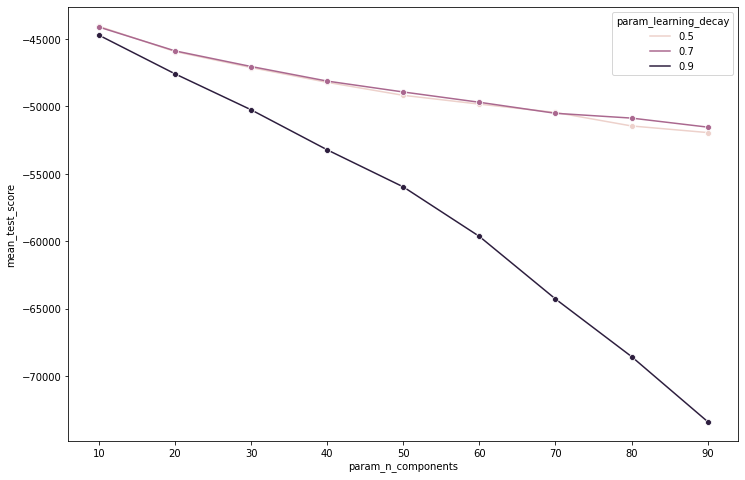

In [195]:
import seaborn as sns
plt.figure(figsize=(12,8))

sns.lineplot(data=results,
             x='param_n_components',
             y='mean_test_score',
             hue='param_learning_decay',
             # https://github.com/mwaskom/seaborn/issues/1515
            
             marker='o'
            )

# # Would need a good way to show three error bars
# plt.errorbar(x=results['param_n_components'],
#              y=results.mean_test_score,
#              yerr=results.std_test_score,
#              fmt='none',
#              color=current_palette[0])

plt.show()

In [196]:
print(data_vectorized)

  (0, 165)	216
  (0, 230)	14
  (0, 487)	34
  (0, 226)	12
  (0, 479)	5
  (0, 338)	14
  (0, 435)	30
  (0, 481)	2
  (0, 98)	3
  (0, 303)	29
  (0, 89)	2
  (0, 93)	8
  (0, 567)	15
  (0, 250)	7
  (0, 289)	16
  (0, 564)	25
  (0, 279)	76
  (0, 101)	5
  (0, 594)	10
  (0, 574)	13
  (0, 299)	6
  (0, 473)	6
  (0, 308)	13
  (0, 150)	3
  (0, 444)	23
  :	:
  (8239, 69)	1
  (8239, 557)	1
  (8240, 479)	1
  (8240, 652)	1
  (8240, 428)	1
  (8240, 9)	1
  (8240, 437)	1
  (8240, 177)	1
  (8241, 279)	2
  (8242, 165)	1
  (8242, 317)	1
  (8243, 279)	1
  (8243, 257)	1
  (8243, 298)	1
  (8243, 344)	2
  (8243, 456)	1
  (8243, 514)	1
  (8244, 279)	1
  (8244, 74)	1
  (8245, 279)	1
  (8246, 165)	1
  (8246, 312)	1
  (8246, 103)	1
  (8247, 659)	1
  (8247, 207)	1


In [197]:
data_vectorized

<8248x684 sparse matrix of type '<class 'numpy.int64'>'
	with 31570 stored elements in Compressed Sparse Row format>

In [198]:
lda_output

array([[0.04591991, 0.13949541, 0.77631293, 0.03827175],
       [0.44962227, 0.45008084, 0.0501899 , 0.05010699],
       [0.8409148 , 0.02272962, 0.02278133, 0.11357425],
       ...,
       [0.12512447, 0.62429653, 0.12500009, 0.12557891],
       [0.06250023, 0.06252374, 0.81247543, 0.0625006 ],
       [0.08333385, 0.08333392, 0.41667051, 0.41666172]])

In [199]:
# Create Document — Topic Matrix
lda_output = best_lda_model.transform(data_vectorized)
# column names
topicnames = ["Topic" + str(i) for i in range(best_lda_model.n_components)]
# index names
docnames = ["Doc" + str(i) for i in range(len(data))]
# Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_output, 2), columns=topicnames, index=docnames)
# Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
# Styling
def color_green(val):
 color = 'green' if val > .1 else 'lack'
 return 'color: {col}'.format(col=color)
def make_bold(val):
 weight = 700 if val > .1 else 400
 return 'font-weight: {weight}'.format(weight=weight)
# Apply Style
df_document_topics = df_document_topic.head(50).style.applymap(color_green).applymap(make_bold)
df_document_topics

,Topic0,Topic1,Topic2,Topic3,Topic4,Topic5,Topic6,Topic7,Topic8,Topic9,dominant_topic
Doc0,0.020000,0.030000,0.030000,0.100000,0.640000,0.030000,0.040000,0.060000,0.020000,0.030000,4
Doc1,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.020000,0.220000,0.390000,0.250000,8
Doc2,0.010000,0.010000,0.370000,0.010000,0.010000,0.190000,0.010000,0.010000,0.370000,0.010000,2
Doc3,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0.050000,0
Doc4,0.360000,0.200000,0.010000,0.010000,0.010000,0.010000,0.160000,0.200000,0.010000,0.010000,0
Doc5,0.030000,0.030000,0.030000,0.030000,0.370000,0.370000,0.030000,0.030000,0.030000,0.030000,4
Doc6,0.150000,0.010000,0.010000,0.260000,0.010000,0.010000,0.010000,0.140000,0.380000,0.010000,8
Doc7,0.050000,0.050000,0.050000,0.050000,0.550000,0.050000,0.050000,0.050000,0.050000,0.050000,4
Doc8,0.030000,0.770000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,1
Doc9,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.030000,0.370000,0.030000,0.370000,7


In [200]:
df_document_topics.to_excel('styled.xlsx', engine='openpyxl')

In [201]:
# Topic-Keyword Matrix
df_topic_keywords = pd.DataFrame(best_lda_model.components_)
# Assign Column and Index
df_topic_keywords.columns = vectorizer.get_feature_names()
df_topic_keywords.index = topicnames
# View
df_topic_keywords.head()
df_topic_keywords.to_csv("vector_text_LDA.csv")

In [202]:
df_topic_keywords

,กระดาษ,กระตุก,กระตุ้น,กระทันหัน,กระเด็น,กระแทก,กรุงเทพ,กลับด้าน,กลับบ้าน,กลับมา,กลางคืน,กลางวัน,กลางเดือน,กลายเป็น,กลุ้มใจ,กล้ามเนื้อ,กะปริดกะปรอย,กะปริบกะปรอย,กังวลใจ,กางเกงชั้นใน,กางเกงใน,การขูด,การคุม,การคุมกำเนิด,การตรวจเลือด,การทำงาน,การบวม,การปฏิสนธิ,การป้องกัน,การผ่า,การฝังเข็ม,การยุติ,การรักษา,การสวม,การสอดใส่,การเงิน,การเจาะ,กำเนิด,กิจกรรม,กินข้าว,...,แป้งเปียก,แพ้ท้อง,แม่นยำ,แรกเริ่ม,แล้วก็,แล้วจึง,แล้วด้วย,แล้วไป,โดยตรง,โดยที่,โดยปกติ,โปรตีน,โรคกระเพาะ,โรคประจำตัว,โรงบาล,โรงพยาบาล,ใจสั่น,ใจเต้น,ใช้เวลา,ใช้เวลานาน,ใช้ได้,ใต้สะดือ,ในกรณีที่,ในกรณีนี้,ในขณะที่,ในอนาคต,ใบรับรองแพทย์,ให้การ,ให้ทาน,ให้น้ำ,ให้ได้,ได้กลิ่น,ได้คิด,ไทรอยด์,ไปเที่ยว,ไมเกรน,ไม่ต้อง,ไม่ต้องการ,ไม่เลย,ๆเเล้ว
Topic0,0.100000,0.100010,0.100006,0.100007,0.100002,0.100007,0.100002,0.100000,0.100006,0.100013,0.100019,6.975845,0.100005,0.100005,0.100000,0.100003,0.100052,0.100062,0.100011,0.100018,107.759758,0.100000,0.100009,0.100022,0.100020,0.100004,0.100065,0.100005,0.100011,0.100000,0.100008,0.100002,0.100003,0.100000,0.100007,0.100000,0.100003,0.100006,0.100005,0.100004,...,0.100005,0.100006,0.100003,7.161182,0.100009,0.100026,0.100047,0.100016,0.100004,0.100007,0.100033,0.100008,0.100030,0.100000,0.100001,0.100004,3.485184,16.941402,0.100000,0.100001,0.100000,0.100007,0.100032,0.100010,0.100019,0.100012,0.100000,0.100000,42.450200,0.100008,0.100006,0.100002,4.345684,0.100006,0.100005,0.100003,0.100011,0.100000,0.100087,0.100003
Topic1,0.100001,0.100003,0.100000,0.100015,0.100004,0.100014,0.100000,0.100006,0.100007,0.100006,0.100009,0.100002,32.632602,0.100000,0.100030,0.100022,0.100003,14.224975,0.100006,0.100009,0.100005,6.535591,0.100014,0.100010,0.100007,0.100039,0.100031,0.100009,0.100018,0.100022,0.100008,0.100000,0.100003,0.100010,0.100002,0.100000,0.100001,0.100013,0.100000,0.100003,...,0.100007,0.100003,0.100002,0.100014,0.100013,0.100027,0.100009,0.100017,0.100004,0.100012,25.966513,0.100000,0.100022,0.100002,0.100002,0.100001,0.100001,0.100001,0.100009,0.100001,0.100014,0.100003,33.389023,0.100011,0.100033,0.100006,0.100000,0.100026,0.100009,0.100003,0.100002,0.100001,0.100021,0.100002,0.100000,0.100022,0.100009,0.100000,0.100000,0.100000
Topic2,0.100012,0.100001,0.100052,0.100005,0.100045,6.894009,0.100000,11.788475,0.100004,0.100006,0.100002,0.100006,0.100001,0.100000,0.100028,0.100003,0.100053,0.100005,0.100015,0.100070,0.100027,0.100000,0.100018,0.100023,0.100080,0.100000,10.869168,0.100011,0.100009,0.100024,0.100000,0.100001,0.100002,0.100035,0.100025,0.100000,0.100003,0.100006,0.100023,0.100006,...,0.100000,0.100003,0.100001,0.100003,0.100013,0.100024,0.100010,0.100041,0.100014,95.568254,0.100002,0.100003,0.100094,0.100004,0.100003,0.100001,0.100004,0.100005,0.100020,7.830304,0.100007,0.100000,0.100050,0.100032,0.100101,0.100000,0.100000,0.100082,0.100003,4.867185,0.100012,0.100014,0.100003,0.100001,0.100009,0.100002,0.100005,0.100000,0.100035,0.100000
Topic3,0.100014,0.100038,9.851212,0.100048,0.100024,0.100006,0.100000,0.100011,17.529862,0.100012,25.644251,0.100011,0.100004,0.100011,0.100021,0.100016,0.100006,0.100039,0.100009,0.100031,0.100010,0.100008,0.100006,47.541072,0.100028,0.100017,0.100004,0.100011,0.100009,0.100000,0.100019,0.100009,0.100005,0.100000,0.100006,0.100000,0.100004,0.100007,0.100001,0.100020,...,0.100023,0.100035,0.100000,0.100000,386.189372,0.100013,0.100012,0.100016,12.354460,0.100017,0.100010,0.100003,0.100069,0.100001,0.100003,0.100004,0.100067,0.100017,0.100002,0.100007,0.100001,0.100036,0.100007,0.100002,0.100006,0.100003,0.100000,0.100000,0.100009,0.100005,0.100000,0.100027,0.100002,0.100002,0.100003,0.100014,55.732169,0.100001,0.100020,0.100014
Topic4,0.100002,9.108934,0.100053,0.100029,0.100018,0.100004,0.100014,0.100000,0.100014,0.100008,0.100010,0.100015,0.100007,8.203341,0.100065,5.436614,0.100016,0.100023,0.100015,7.406323,0.100005,0.100055,0.100021,0.100012,0.100061,16.434706,0.100041,9.537905,0.100015,0.100040,0.100008,0.100012,27.907504,0.100001,0.100003,0.100024,0.100012,0.100014,0.100004

In [203]:
df_topic_VECTOR = df_topic_keywords 

In [204]:
# Show top n keywords for each topic
def show_topics(vectorizer=vectorizer, lda_model=lda_model, n_words=20):
    keywords = np.array(vectorizer.get_feature_names())
    topic_keywords = []
    for topic_weights in lda_model.components_:
        top_keyword_locs = (-topic_weights).argsort()[:n_words]
        topic_keywords.append(keywords.take(top_keyword_locs))
    return topic_keywords
topic_keywords = show_topics(vectorizer=vectorizer, lda_model=best_lda_model, n_words=15)
# Topic - Keywords Dataframe
df_topic_keywords = pd.DataFrame(topic_keywords)
df_topic_keywords.columns = ['Word '+str(i) for i in range(df_topic_keywords.shape[1])]
df_topic_keywords.index = ['Topic '+str(i) for i in range(df_topic_keywords.shape[0])]
df_topic_keywords

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14
Topic 0,ยี่ห้อ,ฮอร์โมน,รับประทาน,คุณหมอ,กางเกงใน,เต้านม,วันอาทิตย์,หรือว่า,ติดต่อกัน,ยาคุมกำเนิด,ทำแท้ง,แต่วัน,ให้ทาน,เหมือนกัน,ชนิดเม็ด
Topic 1,ฉุกเฉิน,มีเพศสัมพันธ์,หลังจากนั้น,ประจำเดือน,ป้องกัน,มีโอกาส,รอบเดือน,ที่สอง,รายเดือน,คุณหมอ,นึกได้,ตอนเย็น,ในกรณีที่,กลางเดือน,อนามัย
Topic 2,แบบนี้,เข้าไป,ช่องคลอด,สอดใส่,หล่อลื่น,มีโอกาส,น้ำอสุจิ,ตรงเวลา,ผู้หญิง,โดยที่,หลังจากนั้น,ประสิทธิภาพ,เพศชาย,ยางแตก,มีผลต่อ
Topic 3,แล้วก็,แบบนี้,ปวดท้อง,ท้องน้อย,อาเจียน,มีเรื่อง,ช่องคลอด,หน้าอก,ปวดหัว,เวียนหัว,ออกจาก,สาเหตุ,ไม่ต้อง,คลอดลูก,ตอนแรก
Topic 4,ตั้งครรภ์,คุณหมอ,อันตราย,ผิดปกติ,เป็นโรค,เป็นอันตราย,ผ่าตัด,น้ำหนัก,ความเสี่ยง,ตรวจเลือด,ตั้งท้อง,ติดเชื้อ,เข้าเดือน,มีปัญหา,มีผลต่อ
Topic 5,ตั้งครรภ์,โรงพยาบาล,เครียด,ค่าใช้จ่าย,เป็นไร,ฝากครรภ์,กลับมา,ช่วยตัวเอง,คุณหมอ,เสียค่าใช้จ่าย,เพื่อน,เป็นไปได้,อักเสบ,คำปรึกษา,ทั้งสอง
Topic 6,คุมกำเนิด,ตั้งครรภ์,ที่ผ่านมา,ตอนเช้า,ปัสสาวะ,ผลข้างเคียง,ตัวเอง,แบบนี้,ตอนที่,ตรวจการ,ต้นเดือน,ตอนกลางคืน,เป็นเวลา,ว่าการ,ธรรมดา
Topic 7,ประจำเดือน,ทำหมัน,คุณหมอ,สีน้ำตาล,อยากรู้,ยาเม็ด,ฝังเข็ม,ครบกำหนด,ครั้งสุดท้าย,ตามปกติ,ตรงเวลา,ที่ผ่านมา,หลังจากที่,หรือว่า,เมื่อเดือนที่แล้ว
Topic 8,มีเพศสัมพันธ์,ถุงยาง,ยาคุมกำเนิด,มีโอกาส,ถุงยางอนามัย,มีสิทธิ์,คุณหมอ,ข้างนอก,ข้างใน,แล้วไป,อีกครั้ง,ปลอดภัย,มีประสิทธิภาพ,วันสุดท้าย,ก่อนที่จะ
Topic 9,ป้องกัน,มีโอกาส,ครั้งแรก,อวัยวะเพศ,มีเพศสัมพันธ์,พันธุ์,ครับผม,เดือนขาด,การสอดใส่,ตอนนั้น,ผู้ชาย,สอดใส่,รู้ตัว,เลยกำหนด,เเฟนผม


In [205]:
# Construct the k-means clusters
from sklearn.cluster import KMeans
clusters = KMeans(n_clusters=4, random_state=100).fit_predict(lda_output)
# Build the Singular Value Decomposition(SVD) model
svd_model = TruncatedSVD(n_components=2)  # 2 components
lda_output_svd = svd_model.fit_transform(lda_output)
# X and Y axes of the plot using SVD decomposition
x = lda_output_svd[:, 0]
y = lda_output_svd[:, 1]
# Weights for the 15 columns of lda_output, for each component
print("Component's weights: \n", np.round(svd_model.components_, 2))
# Percentage of total information in 'lda_output' explained by the two components
print("Perc of Variance Explained: \n", np.round(svd_model.explained_variance_ratio_, 2))

Component's weights: 
 [[ 0.17  0.25  0.23  0.2   0.42  0.19  0.18  0.62  0.35  0.26]
 [ 0.02  0.01  0.07  0.05  0.79  0.08  0.02 -0.6  -0.05  0.02]]
Perc of Variance Explained: 
 [0.03 0.22]


In [206]:
lda_output

array([[0.0176019 , 0.02832316, 0.03125864, ..., 0.06074508, 0.0197589 ,
        0.02585485],
       [0.02      , 0.02000255, 0.02      , ..., 0.21999906, 0.39072465,
        0.24927374],
       [0.00909091, 0.00909124, 0.37272722, ..., 0.00909091, 0.37271753,
        0.00910028],
       ...,
       [0.05      , 0.0500028 , 0.05      , ..., 0.5499972 , 0.05      ,
        0.05      ],
       [0.025     , 0.025     , 0.025     , ..., 0.025     , 0.025     ,
        0.025     ],
       [0.03333333, 0.03333333, 0.03333333, ..., 0.36666653, 0.03333333,
        0.03333333]])

In [207]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(lda_output)
data_transformed = mms.transform(lda_output)
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float))
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')

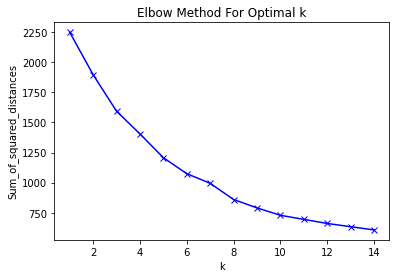

In [208]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(data_transformed)
    Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [209]:
data_transformed

array([[0.01749837, 0.02988911, 0.03210875, ..., 0.06468609, 0.02091873,
        0.02792679],
       [0.02011461, 0.02049408, 0.01956514, ..., 0.24216944, 0.44738499,
        0.28477211],
       [0.00821316, 0.00817382, 0.41255006, ..., 0.00711921, 0.42668382,
        0.00866552],
       ...,
       [0.05284361, 0.0543682 , 0.05298912, ..., 0.60994157, 0.05568423,
        0.05568438],
       [0.02556945, 0.02613684, 0.0251358 , ..., 0.02484937, 0.02694396,
        0.02694405],
       [0.03466084, 0.03554624, 0.03442024, ..., 0.40562554, 0.03652405,
        0.03652416]])

In [210]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
mms.fit(lda_output)
data_transformed = mms.transform(lda_output)
def plot_clustering(data, labels, title=None):
    x_min, x_max = np.min(data, axis=0), np.max(data, axis=0)
    data = (data - x_min) / (x_max - x_min)
    fig = plt.figure(1, figsize=(4, 3))
    plt.figure(figsize=(6, 4))
    plt.scatter(data[:, 0], data[:, 1],
                 c=labels.astype(np.float))
    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis('off')

Para n_clusters = 2 O score_silhouette médio é : 0.15312406691247923
Para n_clusters = 3 O score_silhouette médio é : 0.2054991873751493
Para n_clusters = 4 O score_silhouette médio é : 0.23510912804943224
Para n_clusters = 5 O score_silhouette médio é : 0.2636411154467077
Para n_clusters = 6 O score_silhouette médio é : 0.2787312402388721
Para n_clusters = 7 O score_silhouette médio é : 0.293960462849064
Para n_clusters = 8 O score_silhouette médio é : 0.31439101696236316
Para n_clusters = 9 O score_silhouette médio é : 0.32048283049568244
Para n_clusters = 10 O score_silhouette médio é : 0.3266659514731197
Para n_clusters = 100 O score_silhouette médio é : 0.36542838521761184


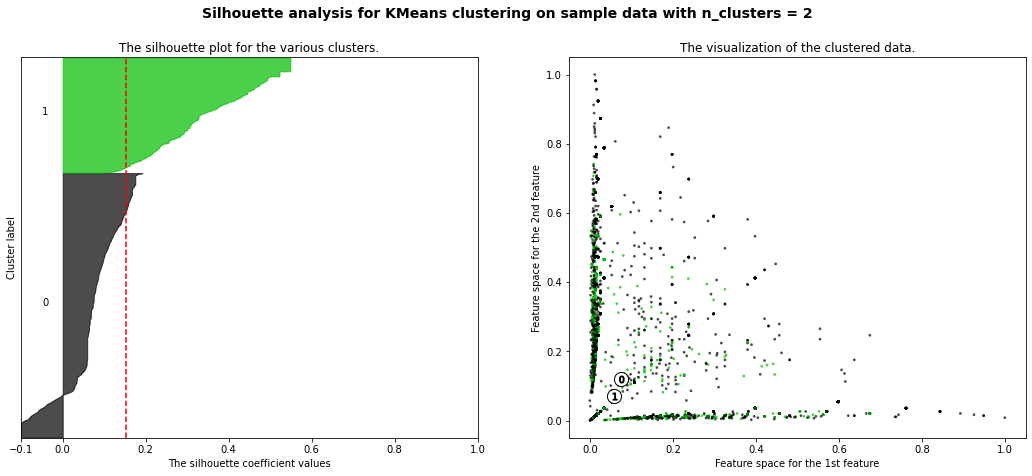

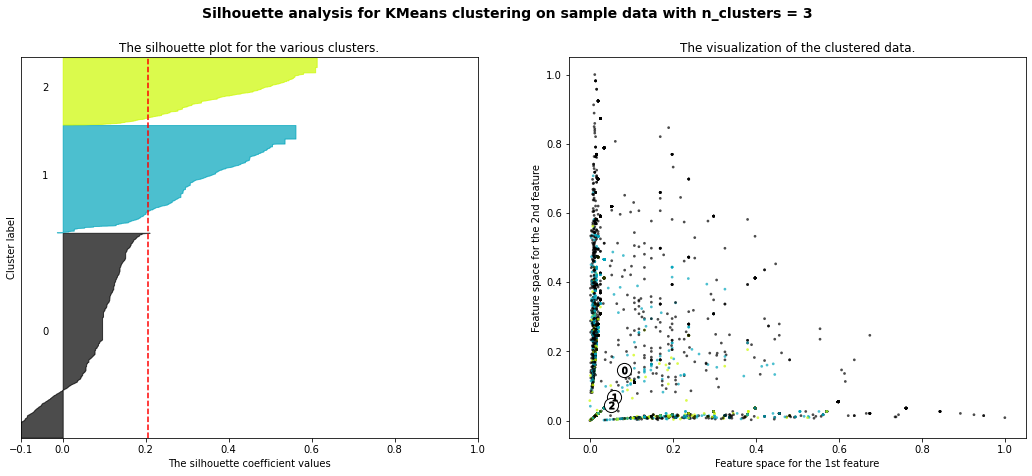

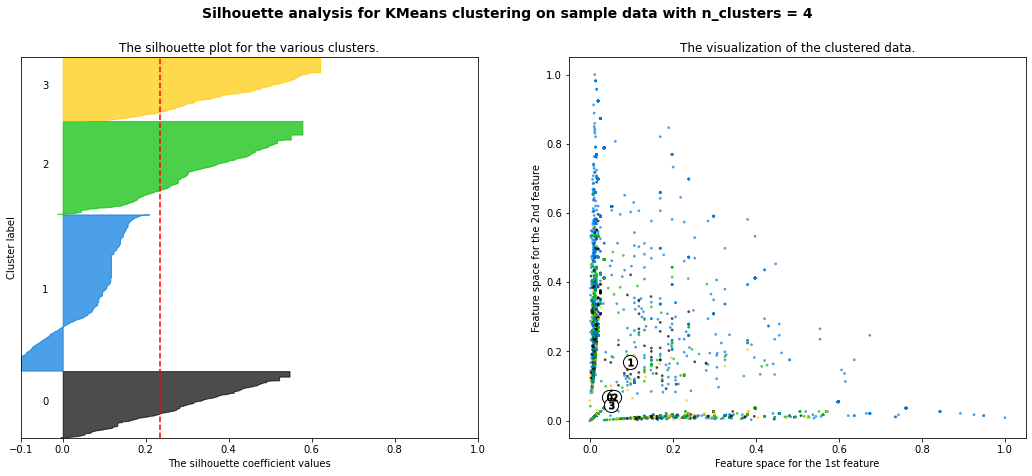

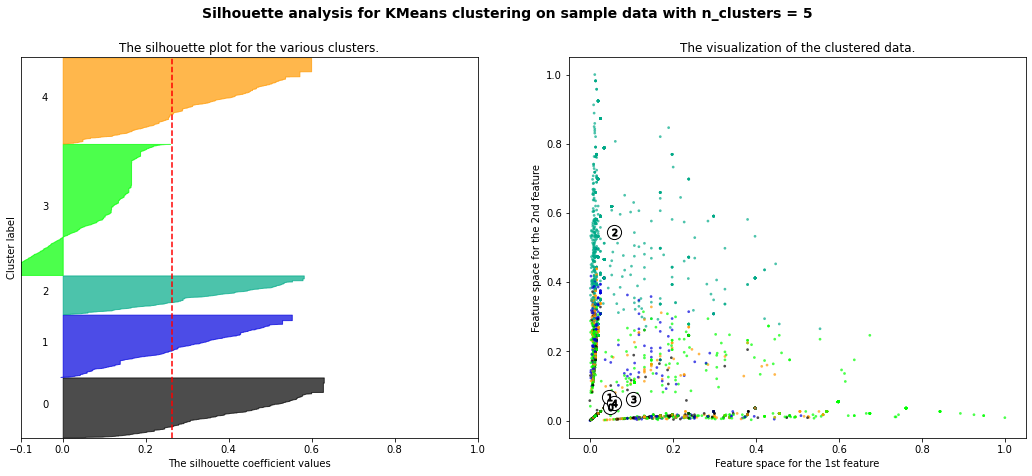

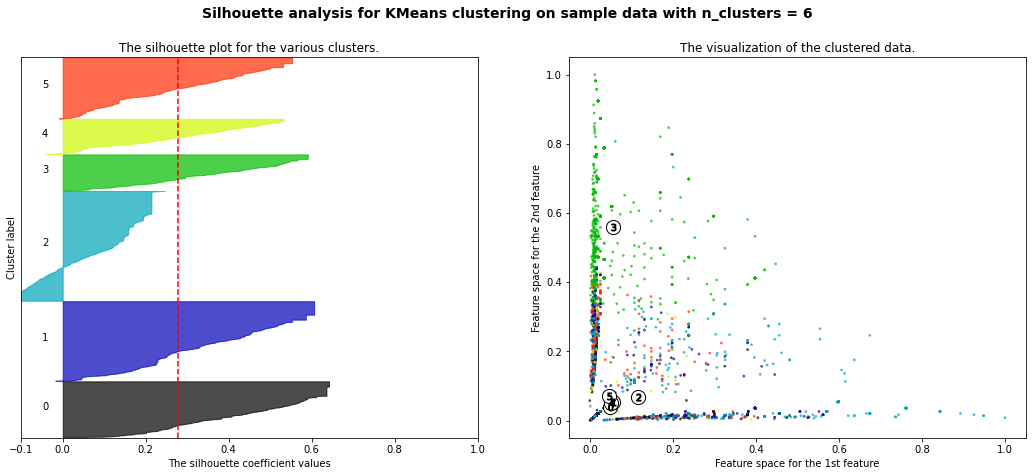

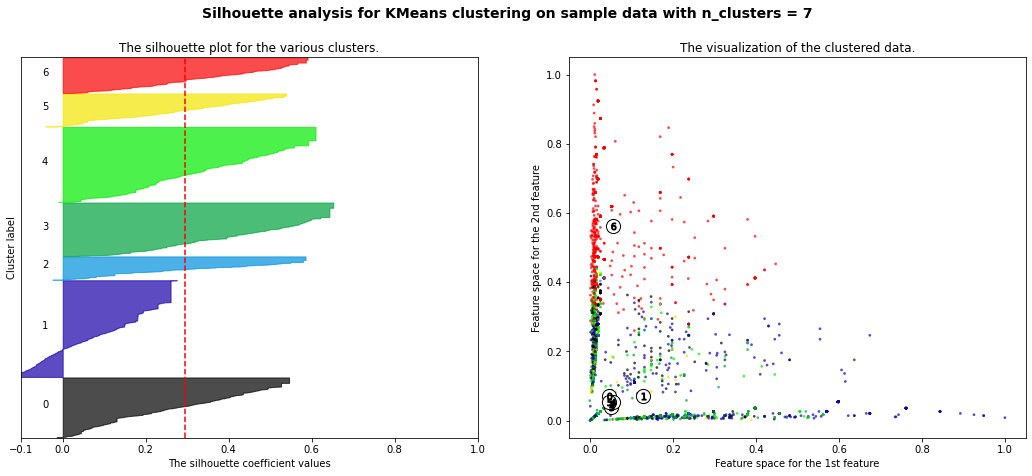

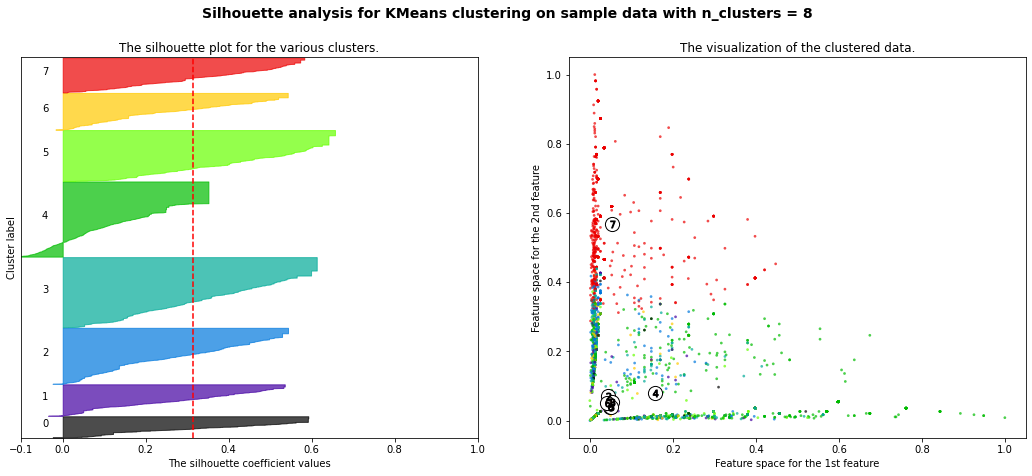

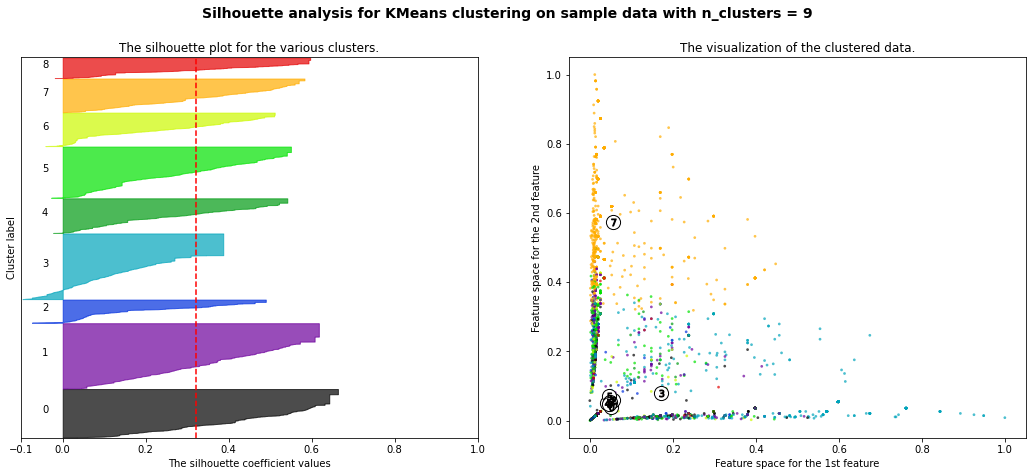

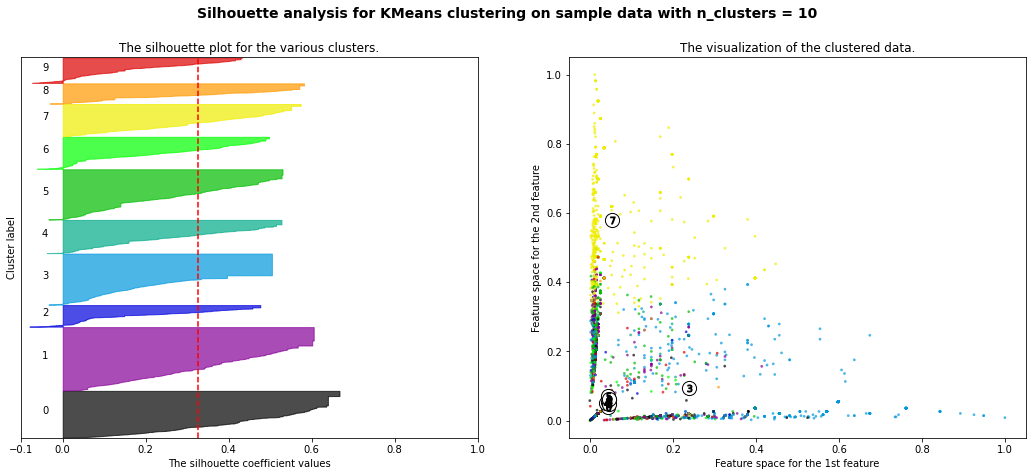

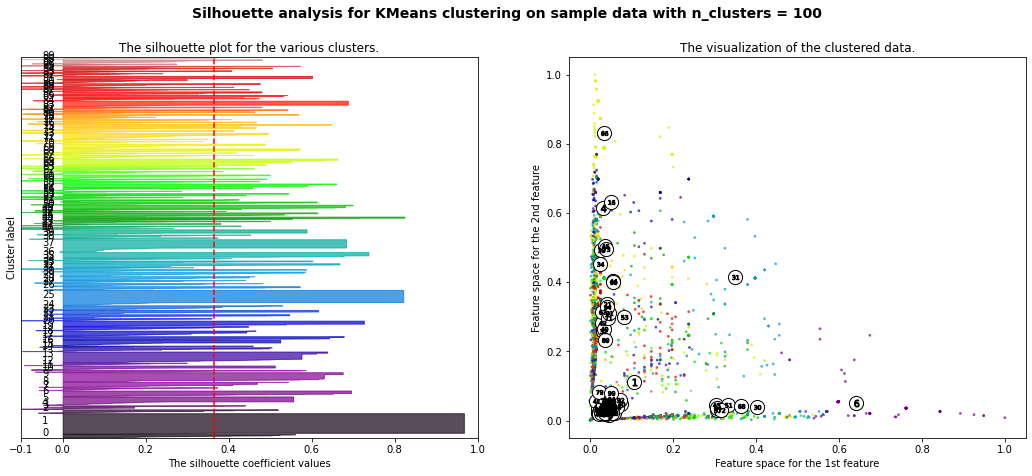

<Figure size 432x288 with 0 Axes>

In [211]:
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import cm
range_n_clusters = [2, 3, 4, 5, 6,7,8,9,10,100]
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_transformed) + (n_clusters + 1) * 10])
    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_transformed)
# The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_transformed, cluster_labels)
    print("Para n_clusters =", n_clusters,
          "O score_silhouette médio é :", silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_transformed, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color,       alpha=0.7)
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(data_transformed[:, 0], data_transformed[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')
    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')
  
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')
    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
plt.show()
plt.savefig("pyLDSvis-paper.png")

===================================================================================================================================================================

In [ ]:
from pandas import DataFrame
data = DataFrame(data_words,columns=['text'])
print (data)

In [ ]:
# Visualize the topics

import pyLDAvis
import pyLDAvis.sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis
import pyLDAvis.gensim

# vectorizer = CountVectorizer()
# doc_term_matrix = vectorizer.fit_transform(corpus)
# lda_model = LatentDirichletAllocation(n_components=2, random_state=888)

data = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)
pyLDAvis.display(data)

In [ ]:

lda_model.fit(data_vectorized)
first_topic = lda_model.components_[0]

In [ ]:
top_topic_words = first_topic.argsort()[-10:]

In [ ]:
for i in top_topic_words:
    print(vectorizer.get_feature_names()[i])

In [ ]:
def print_topics(model, vectorizer, top_n=10):
    for idx, topic in enumerate(model.components_):
        print("Topic %d:" % (idx))
        print([(vectorizer.get_feature_names()[i], topic[i])
                        for i in topic.argsort()[:-top_n - 1:-1]])

print_topics(lda_model, vectorizer)

In [ ]:
for i,topic in enumerate(lda_model.components_):
    print(f'Top 9 words for topic #{i}:')
    print([vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

In [ ]:
topic_values = lda_model.transform(data_vectorized)
topic_values.shape

In [ ]:
documents['Topic'] = topic_values.argmax(axis=1)

In [ ]:
documents.head(50)

In [ ]:
documents.to_csv("topic_to_text.csv")

In [ ]:
documents.groupby(['Topic']).agg(['count'])

In [ ]:

topic_list = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_n = [feature_names[i]
             for i in topic.argsort()
             [-n_words:]][::-1]
    top_features = ' '.join(top_n)
    topic_list.append(f"topic_{'_'.join(top_n[:6])}") 

    print(f"Topic {topic_idx}: {top_features}")

In [212]:
data = pyLDAvis.sklearn.prepare(lda_model, data_vectorized, vectorizer)
pyLDAvis.display(data)


AttributeError: ignored

In [ ]:
vectorizer_tfidf = TfidfVectorizer(analyzer='word', min_df=10, stop_words=stopwords, token_pattern='[a-zA-Z0-9]{3,}',  tokenizer=tokenize )

# num chars > 3
                             # max_features=50000,             
# max number of uniq words    )
data_vectorized_tfidf = vectorizer_tfidf.fit_transform(data_words)

In [ ]:
data_vectorized_tfidf.shape

In [ ]:
print(data_vectorized_tfidf)

In [ ]:

# Build LDA Model
lda_model = LatentDirichletAllocation(n_components=4, max_iter=10,learning_method='online', random_state=100,  batch_size=128, n_jobs = -1,  learning_offset=50.)    # Number of topics
                                                    
# Max learning iterations                                                                              
# Random state                                            
# n docs in each learning iter                                      
# compute perplexity every n iters, default: Don't                                       
# Use all available CPUs
                                     

lda_output_tfidf = lda_model.fit_transform(data_vectorized_tfidf)
print(lda_model)  # Model attributes

In [ ]:
lda_output_tfidf.shape

In [ ]:
# Log Likelyhood: Higher the better
print("Log Likelihood: ", lda_model.score(data_vectorized_tfidf))
# Perplexity: Lower the better. Perplexity = exp(-1. * log-likelihood per word)
print("Perplexity: ", lda_model.perplexity(data_vectorized_tfidf))
# See model parameters
pprint(lda_model.get_params())

In [ ]:
# Log Likelihood:  -175674.80970229727
# Perplexity:  107.3059691159183
# {'batch_size': 128,
#  'doc_topic_prior': None,
#  'evaluate_every': -1,
#  'learning_decay': 0.7,
#  'learning_method': 'online',
#  'learning_offset': 50.0,
#  'max_doc_update_iter': 100,
#  'max_iter': 10,
#  'mean_change_tol': 0.001,
#  'n_components': 4,
#  'n_jobs': -1,
#  'perp_tol': 0.1,
#  'random_state': 100,
#  'topic_word_prior': None,
#  'total_samples': 1000000.0,
#  'verbose': 0}


In [ ]:
results = pd.DataFrame(model.cv_results_)